In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def scale_of_y(res_dict):

    y_min = min(min(res_dict['train']),min(res_dict['test']))*10
    y_max = max(max(res_dict['train']),max(res_dict['test']))*10

    # lower bound
    lower_bound = 0
    if y_min%10 < 0.5:
        lower_bound = np.floor(y_min)
    if y_min%10 >= 0.5:
        lower_bound = np.floor(y_min)-0.1
    # upper bound
    upper_bound = 0
    if y_max%10 < 0.5:
        upper_bound = np.ceil(y_max)+0.1
    if y_max%10 >= 0.5:
        upper_bound = np.ceil(y_max)

    lower_bound = lower_bound / 10.0
    upper_bound = upper_bound / 10.0
    return lower_bound, upper_bound

def plot_bar(res_dict:dict, x_tick:list, title:str):

    # limit of y-axis
    fig = plt.figure(figsize=(25,15),facecolor='white')  
    y_lower_bound, y_upper_bound = scale_of_y(res_dict)
    print("y_upper_bound: ", y_upper_bound)
    print("y_lower_bound: ", y_lower_bound)

    # plot parameters
    wid = 0.3
    blank = 0.06
    offset_lst = [-0.5,0.5]
    text_ratio = 0.005
    color_lst = ['steelblue','skyblue']

    # bar chart
    x = np.arange(0, len(x_tick))
    for idx, ((k, v_lst), offset, clr) in enumerate(zip(res_dict.items(),offset_lst,color_lst)):
        plt.bar(x+offset*wid, v_lst, width=wid-blank, label = k, color = clr)

    # add accuracy text
    for (k, v_lst), offset, clr in zip(res_dict.items(),offset_lst,color_lst):
        for idx,acc in enumerate(v_lst):
            plt.text(idx+offset*wid,acc+wid*text_ratio,acc,color='forestgreen',ha='center',fontsize=30)

    plt.legend(fontsize=30,bbox_to_anchor=(1,1))
    plt.title(title, fontsize=45)
    plt.ylim(ymin=y_lower_bound, ymax=y_upper_bound+0.02)
    plt.xticks(x, x_tick,fontsize = 35)
    plt.yticks(fontsize = 35)
    plt.xlabel('Standarization',fontsize = 40)
    plt.ylabel('Accuracy',fontsize = 40)

In [69]:
static_res = {'train':[0.981,0.983,0.982,0.912,0.98],
              'test':[1.0,1.0,1.0,0.93,0.978]}
dynamic_res = {'train':[0.983,0.980,0.998,0.983,0.994],
               'test':[0.995,0.974,0.991,0.932,0.989]}
x_tick = ['len_spine', 'neck_height','len_arm','len_shoulder','no_scale']

y_upper_bound:  1.01
y_lower_bound:  0.89


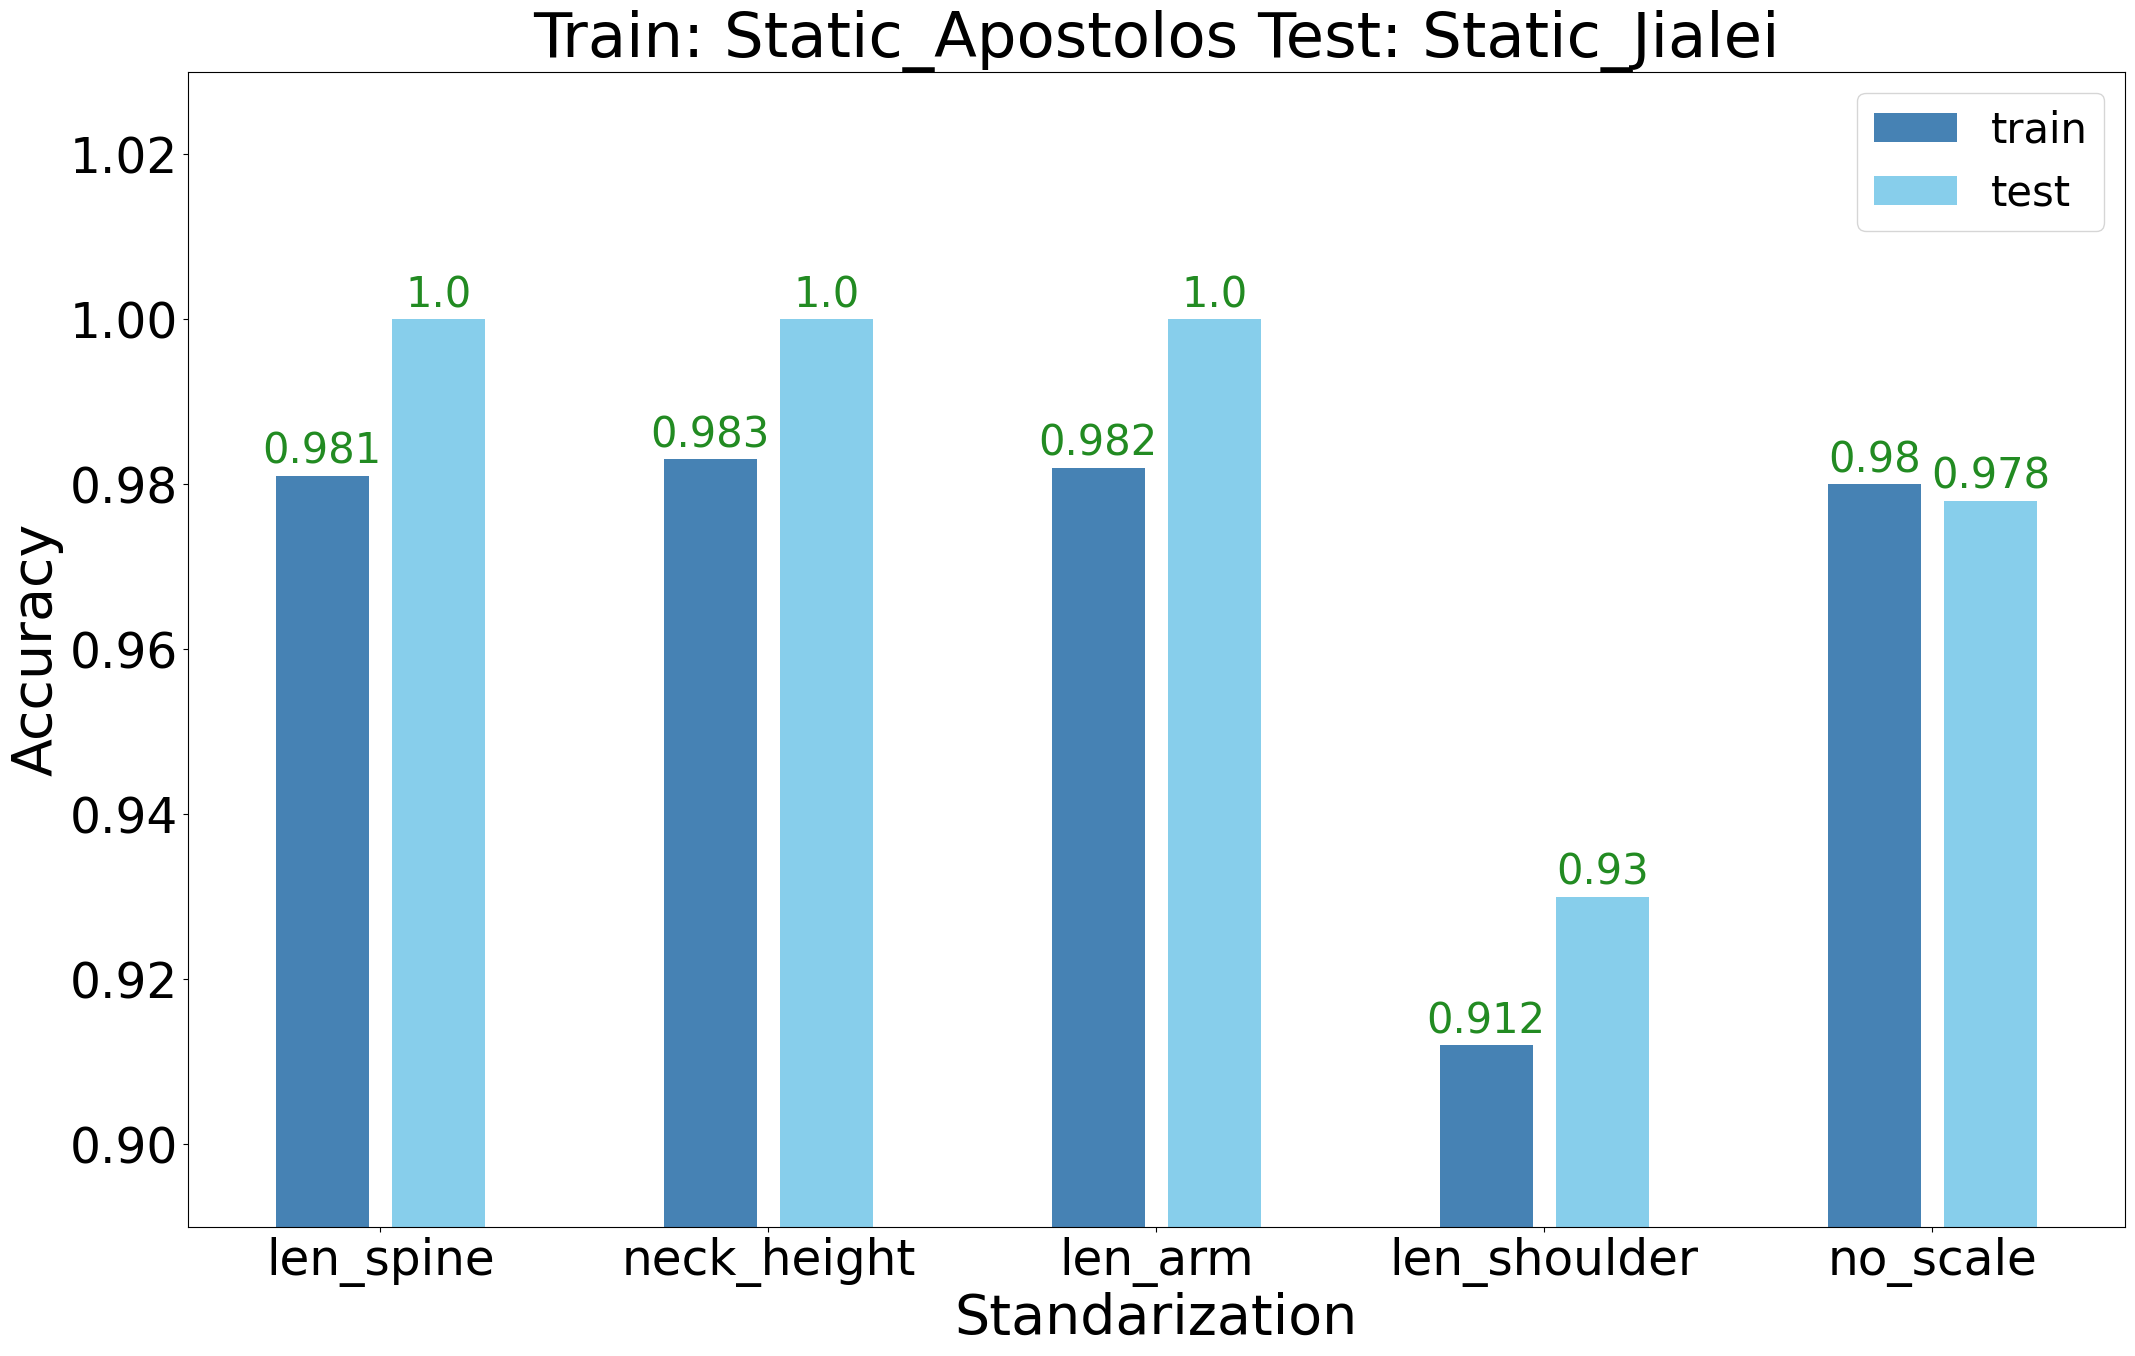

In [83]:
plot_bar(static_res,x_tick,title='Train: Static_Apostolos Test: Static_Jialei')

y_upper_bound:  1.0
y_lower_bound:  0.89


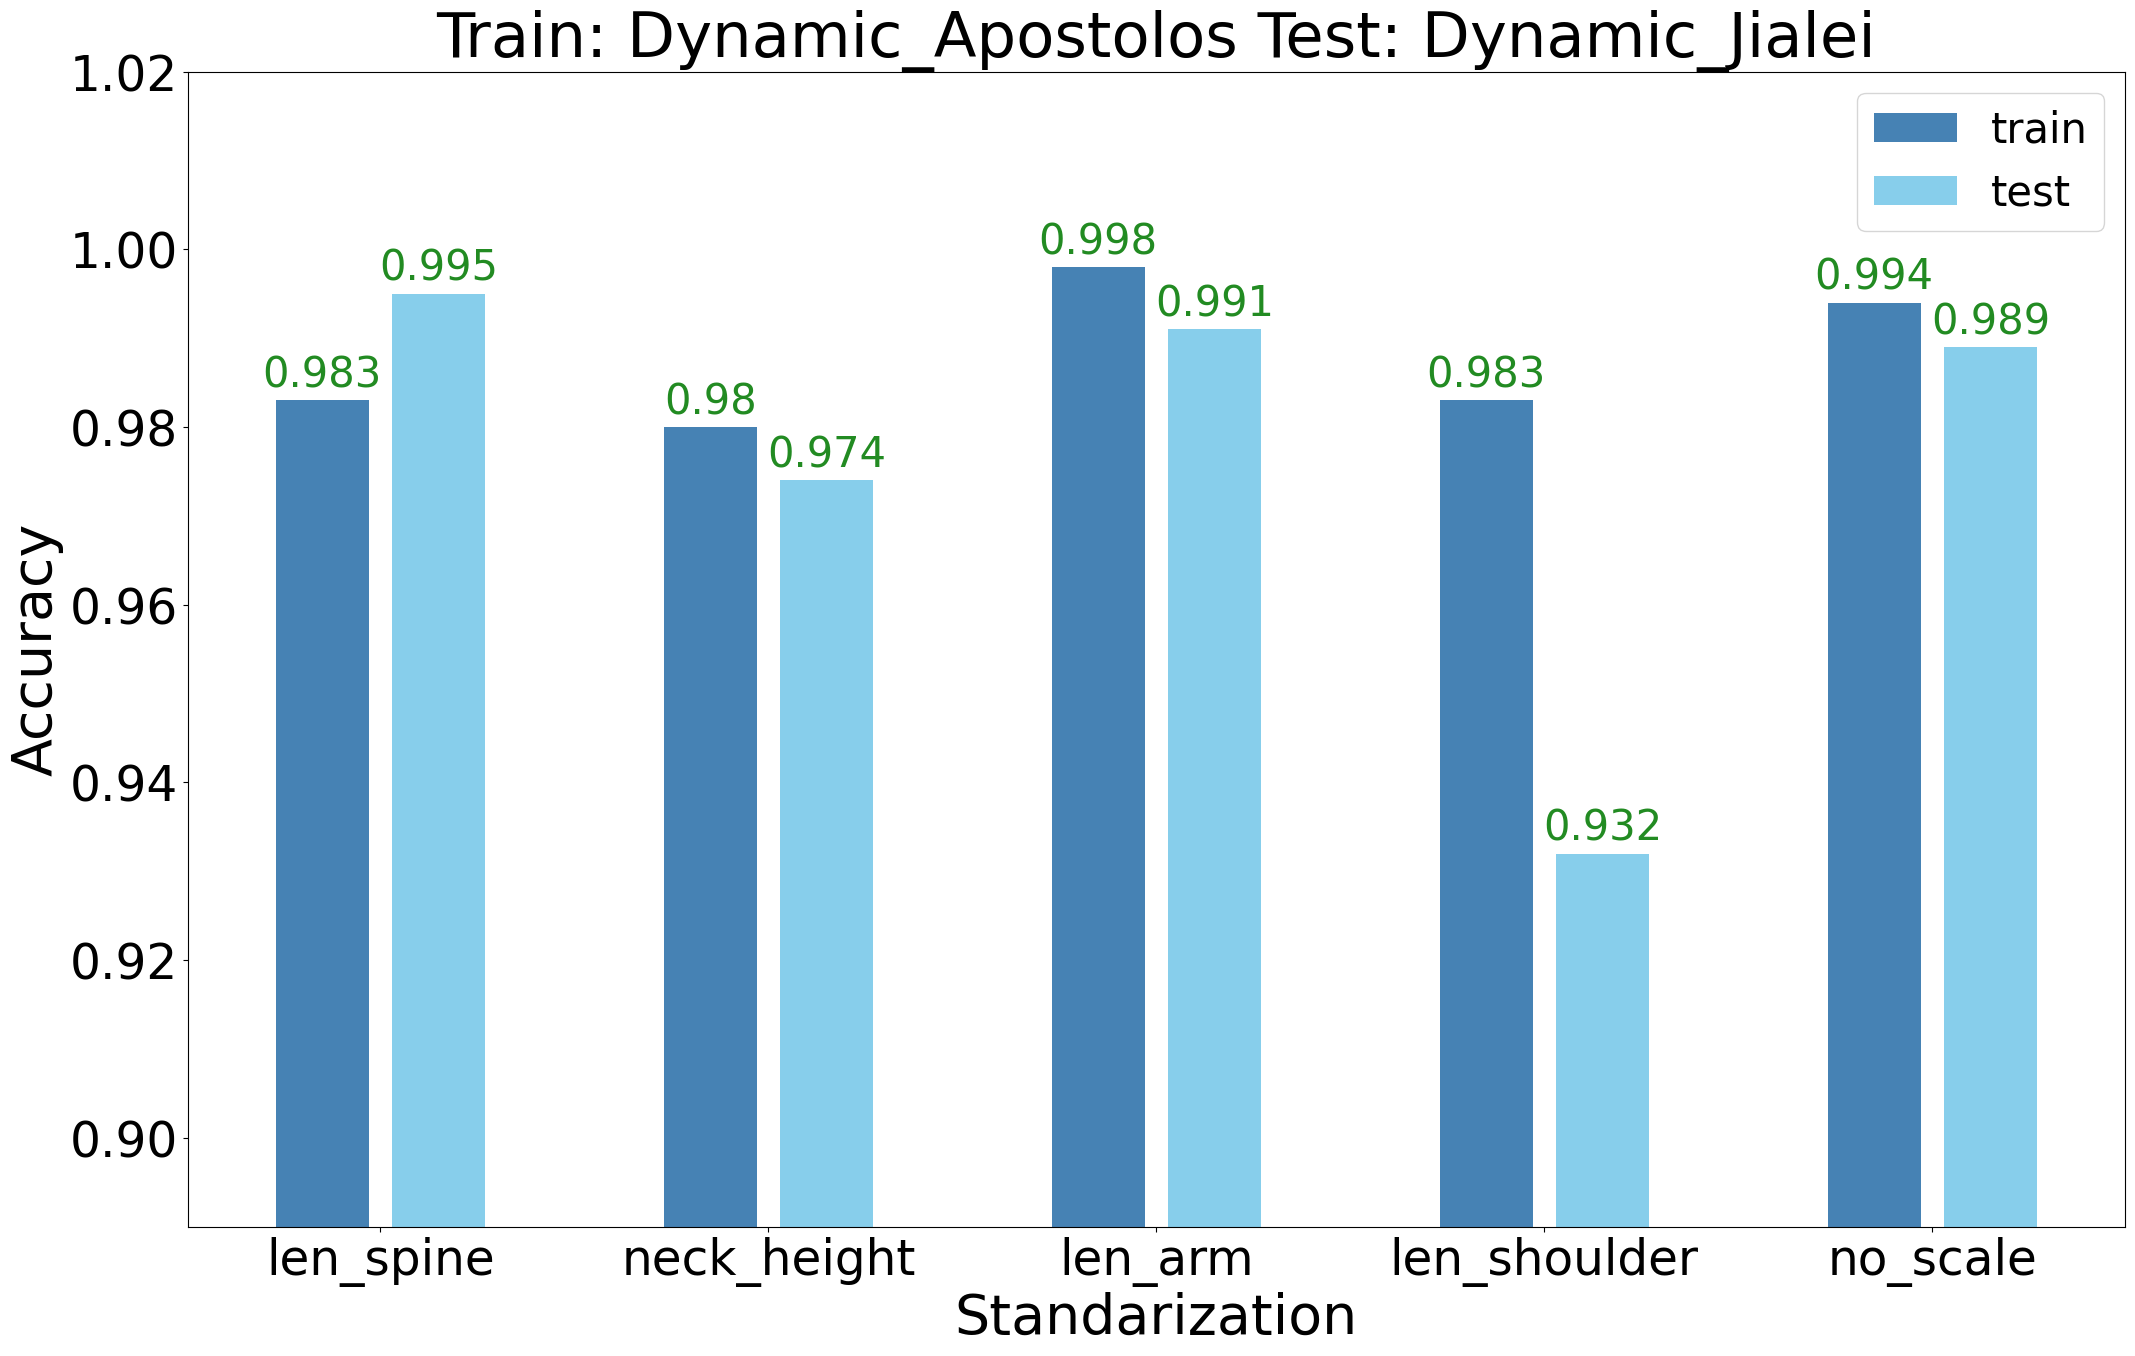

In [84]:
plot_bar(dynamic_res,x_tick,title='Train: Dynamic_Apostolos Test: Dynamic_Jialei')